# CSEM

Reproducing a few published results in the field of Controlled-Source Electromagnetics.


So far there are only two examples. More examples can be found in other notebooks.

### 1. Ziolkowski et al. (2007), Figure 3

A land MTEM example.

**Ziolkowski, A., B. Hobbs, and D. Wright,  2007**  
Multitransient electromagnetic demonstration survey in france  
Geophysics, 72, F197-F209; DOI: [10.1190/1.2735802](http://dx.doi.org/10.1190/1.2735802)

### 2. Constable and Weiss (2006), Figure 3
**Constable, S., and C.~J. Weiss,  2006**  
Mapping thin resistors and hydrocarbons with marine EM methods: Insights from 1d modeling  
Geophysics, 71, G43-G51; DOI: [10.1190/1.2187748](http://dx.doi.org/10.1190/1.2187748)



### More examples could be implemented, some papers that have interesting 1D modelling results:

**Constable, S.,  2010**  
Ten years of marine CSEM for hydrocarbon exploration:  
Geophysics, 75, 75A67-75A81;  
DOI: [10.1190/1.3483451](http://dx.doi.org/10.1190/1.3483451).


**MacGregor, L., and J. Tomlinson,  2014**  
Marine controlled-source electromagnetic methods in the hydrocarbon industry: A tutorial on method and practice:  
Interpretation, 2, SH13-SH32; DOI: [10.1190/INT-2013-0163.1](http://dx.doi.org/10.1190/INT-2013-0163.1)


**Ziolkowski, A., and D. Wright,  2012**  
The potential of the controlled source electromagnetic method: A powerful tool for hydrocarbon exploration, appraisal, and reservoir characterization  
Signal Processing Magazine, IEEE, 29, 36-52; DOI: [10.1109/MSP.2012.2192529](http://dx.doi.org/10.1109/MSP.2012.2192529).

In [1]:
import numpy as np
from matplotlib import rcParams
from copy import deepcopy as dc
import matplotlib.pyplot as plt

from empymod import dipole, utils

%matplotlib inline
rcParams['figure.dpi'] = 300
rcParams['savefig.dpi'] = 300
rcParams['text.usetex'] = True
rcParams['font.serif'] = 'Computer Modern Roman'
rcParams['font.family'] = 'serif'
rcParams['font.style'] = 'normal'

## 1. Ziolkowski et al. (2007), Figure 3
![title](figures/Ziolkowski2007.jpg)

### Calculation

In [2]:
# Time
t = np.linspace(0.001, 0.06, 101)

# Target model
inp2 = {'src': [0, 0, 0.001],
        'rec': [1000, 0, 0.001],
        'depth': [0, 500, 525],
        'res': [2e14, 20, 500, 20],
        'freqtime': t,
        'verb': 1}

# HS model
inp1 = dc(inp2)
inp1['depth'] = inp2['depth'][0]
inp1['res'] = inp2['res'][:2]

# Calculate responses
sths = dipole(**inp1, signal=1)  # Step, HS
sttg = dipole(**inp2, signal=1)  #       Target
imhs = dipole(**inp1, signal=0, ft='fftlog')  # Impulse, HS
imtg = dipole(**inp2, signal=0, ft='fftlog')  #          Target

### Plot

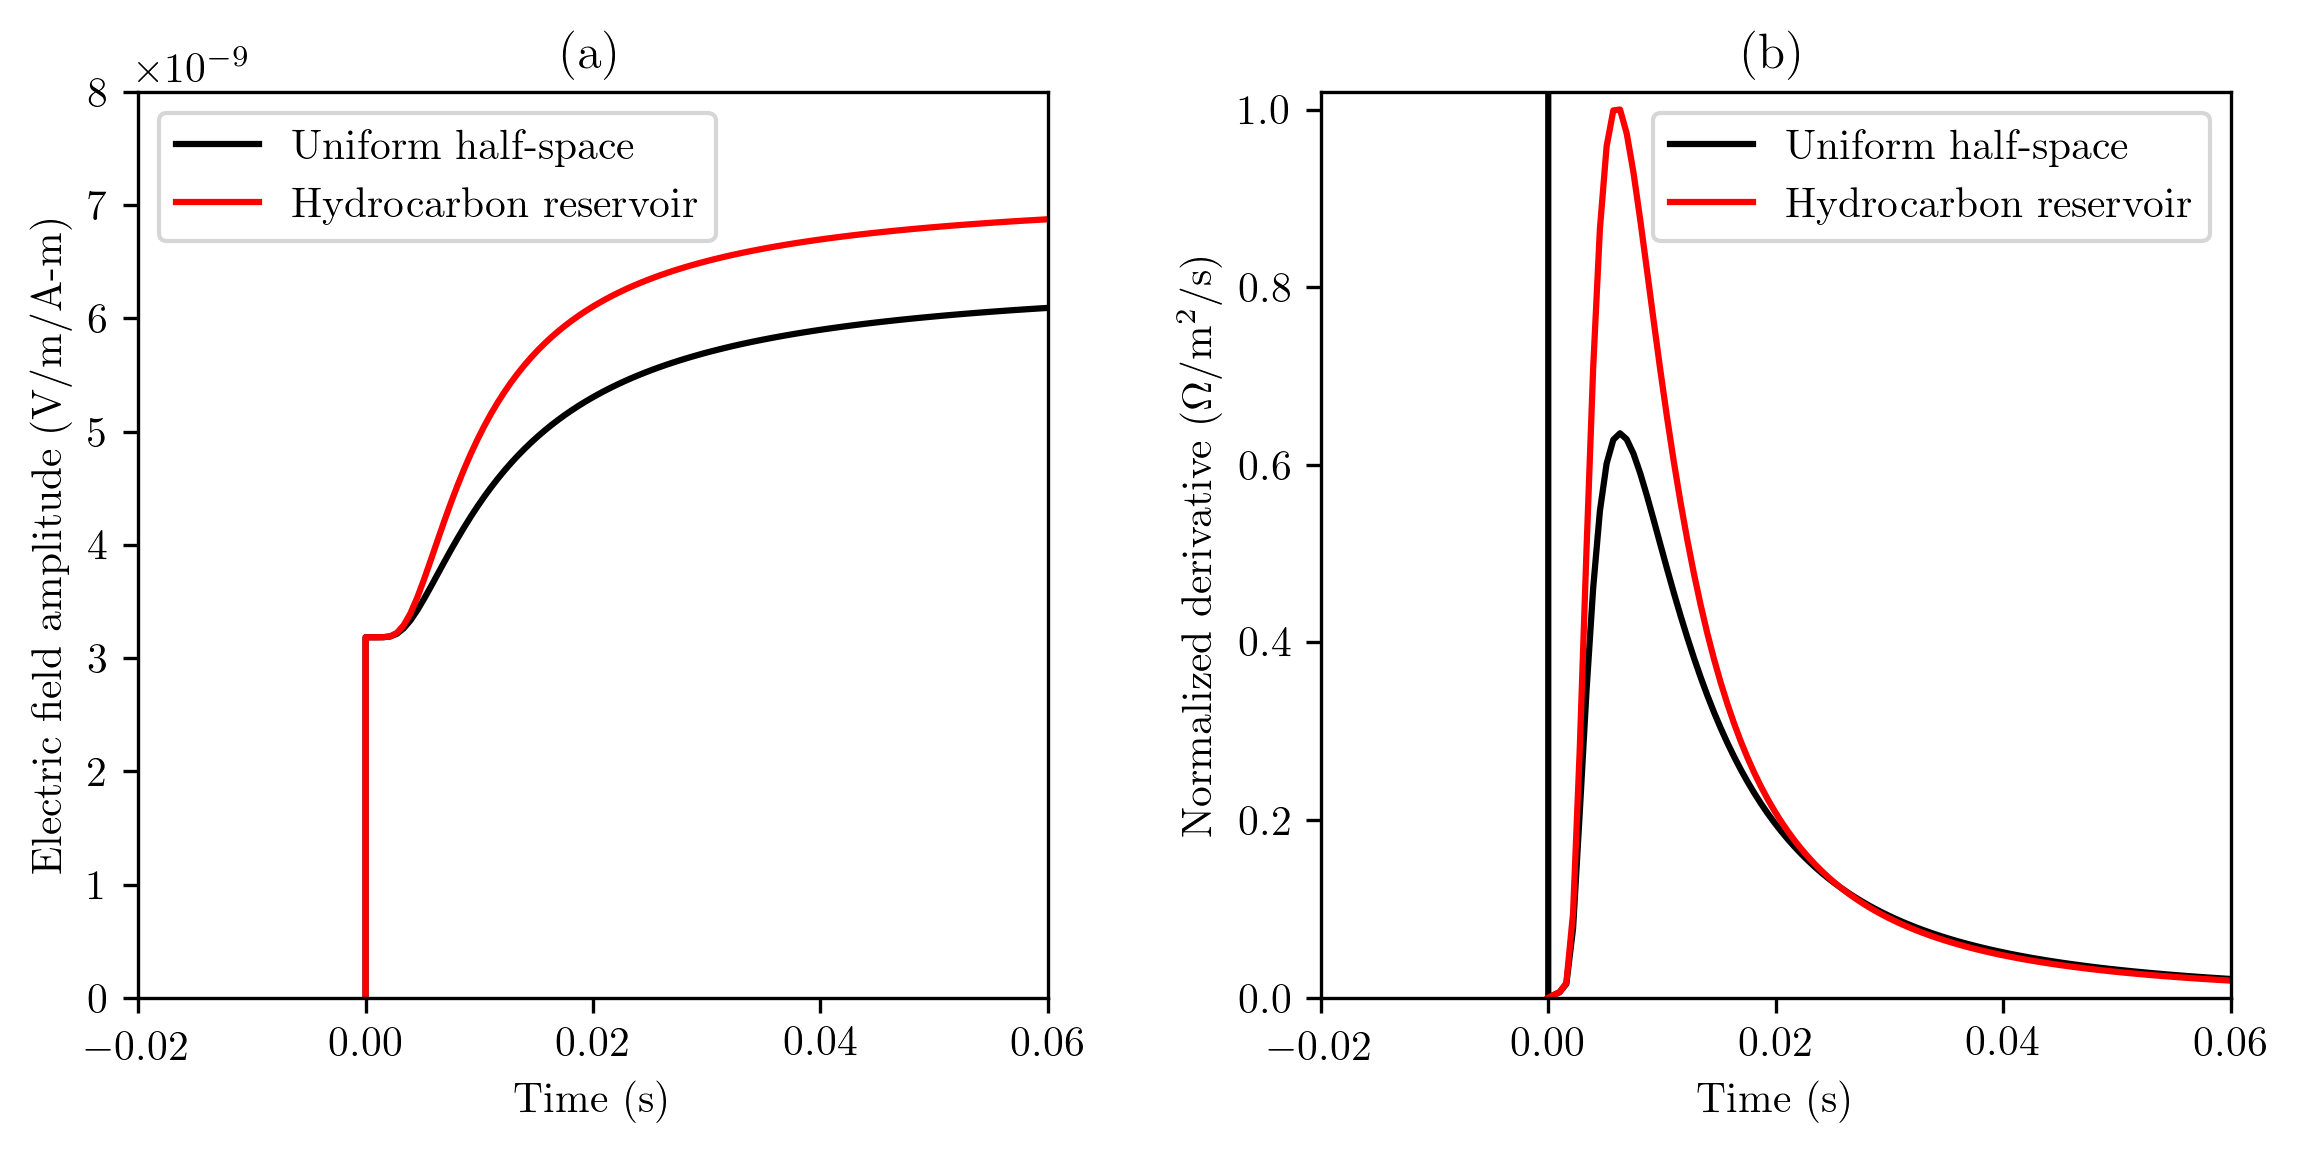

In [3]:
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=.3)

# Step response
plt.subplot(121)
plt.title('(a)')
plt.plot(np.r_[0, 0, t], np.r_[0, sths[0], sths], 'k', label='Uniform half-space')
plt.plot(np.r_[0, 0, t], np.r_[0, sttg[0], sttg], 'r', label='Hydrocarbon reservoir')
plt.axis([-.02, 0.06, 0, 8e-9])
plt.xlabel('Time (s)')
plt.ylabel('Electric field amplitude (V/m/A-m)')
plt.legend()


# Impulse response
plt.subplot(122)
plt.title('(b)')

# Normalize by max-response
ntg = np.max(np.r_[imtg, imhs])

plt.plot(np.r_[0, 0, t], np.r_[2, 0, imhs/ntg], 'k', label='Uniform half-space')
plt.plot(np.r_[0, t], np.r_[0, imtg/ntg], 'r', label='Hydrocarbon reservoir')
plt.axis([-.02, 0.06, 0, 1.02])
plt.xlabel('Time (s)')
plt.ylabel(r'Normalized derivative ($\Omega$/m$^2$/s)')
plt.legend()
plt.show()

## 2. Constable and Weiss (2006), Figure 3
Note: Exact reproduction is not possible, as source and receiver depths are not explicitly specified in the publication. I made a few checks, and it looks like a source-depth of 900 meter gives good accordance. Receivers are on the sea-floor.

![title](figures/Constable2006.jpg)

### Calculation

In [4]:
# Offsets
x = np.linspace(0, 20000, 101)

# TG model
inp3 = {'src': [0, 0, 900],
        'rec': [x, np.zeros(x.shape), 1000],
        'depth': [0, 1000, 2000, 2100],
        'res': [2e14, 0.3, 1, 100, 1],
        'freqtime': 1,
        'verb': 1}

# HS model
inp4 = dc(inp3)
inp4['depth'] = inp3['depth'][:2]
inp4['res'] = inp3['res'][:3]

# Calculate radial responses
rhs = dipole(**inp4)  # Step, HS
rhs = utils.EMArray(np.nan_to_num(rhs))
rtg = dipole(**inp3)  #       Target
rtg = utils.EMArray(np.nan_to_num(rtg))

# Calculate azimuthal response
ahs = dipole(**inp4, ab=22)  # Step, HS
ahs = utils.EMArray(np.nan_to_num(ahs))
atg = dipole(**inp3, ab=22)  #       Target
atg = utils.EMArray(np.nan_to_num(atg))

* WARNING :: Offsets < 0.001 m are set to 0.001 m!
* WARNING :: Offsets < 0.001 m are set to 0.001 m!
* WARNING :: Offsets < 0.001 m are set to 0.001 m!
* WARNING :: Offsets < 0.001 m are set to 0.001 m!


### Plot

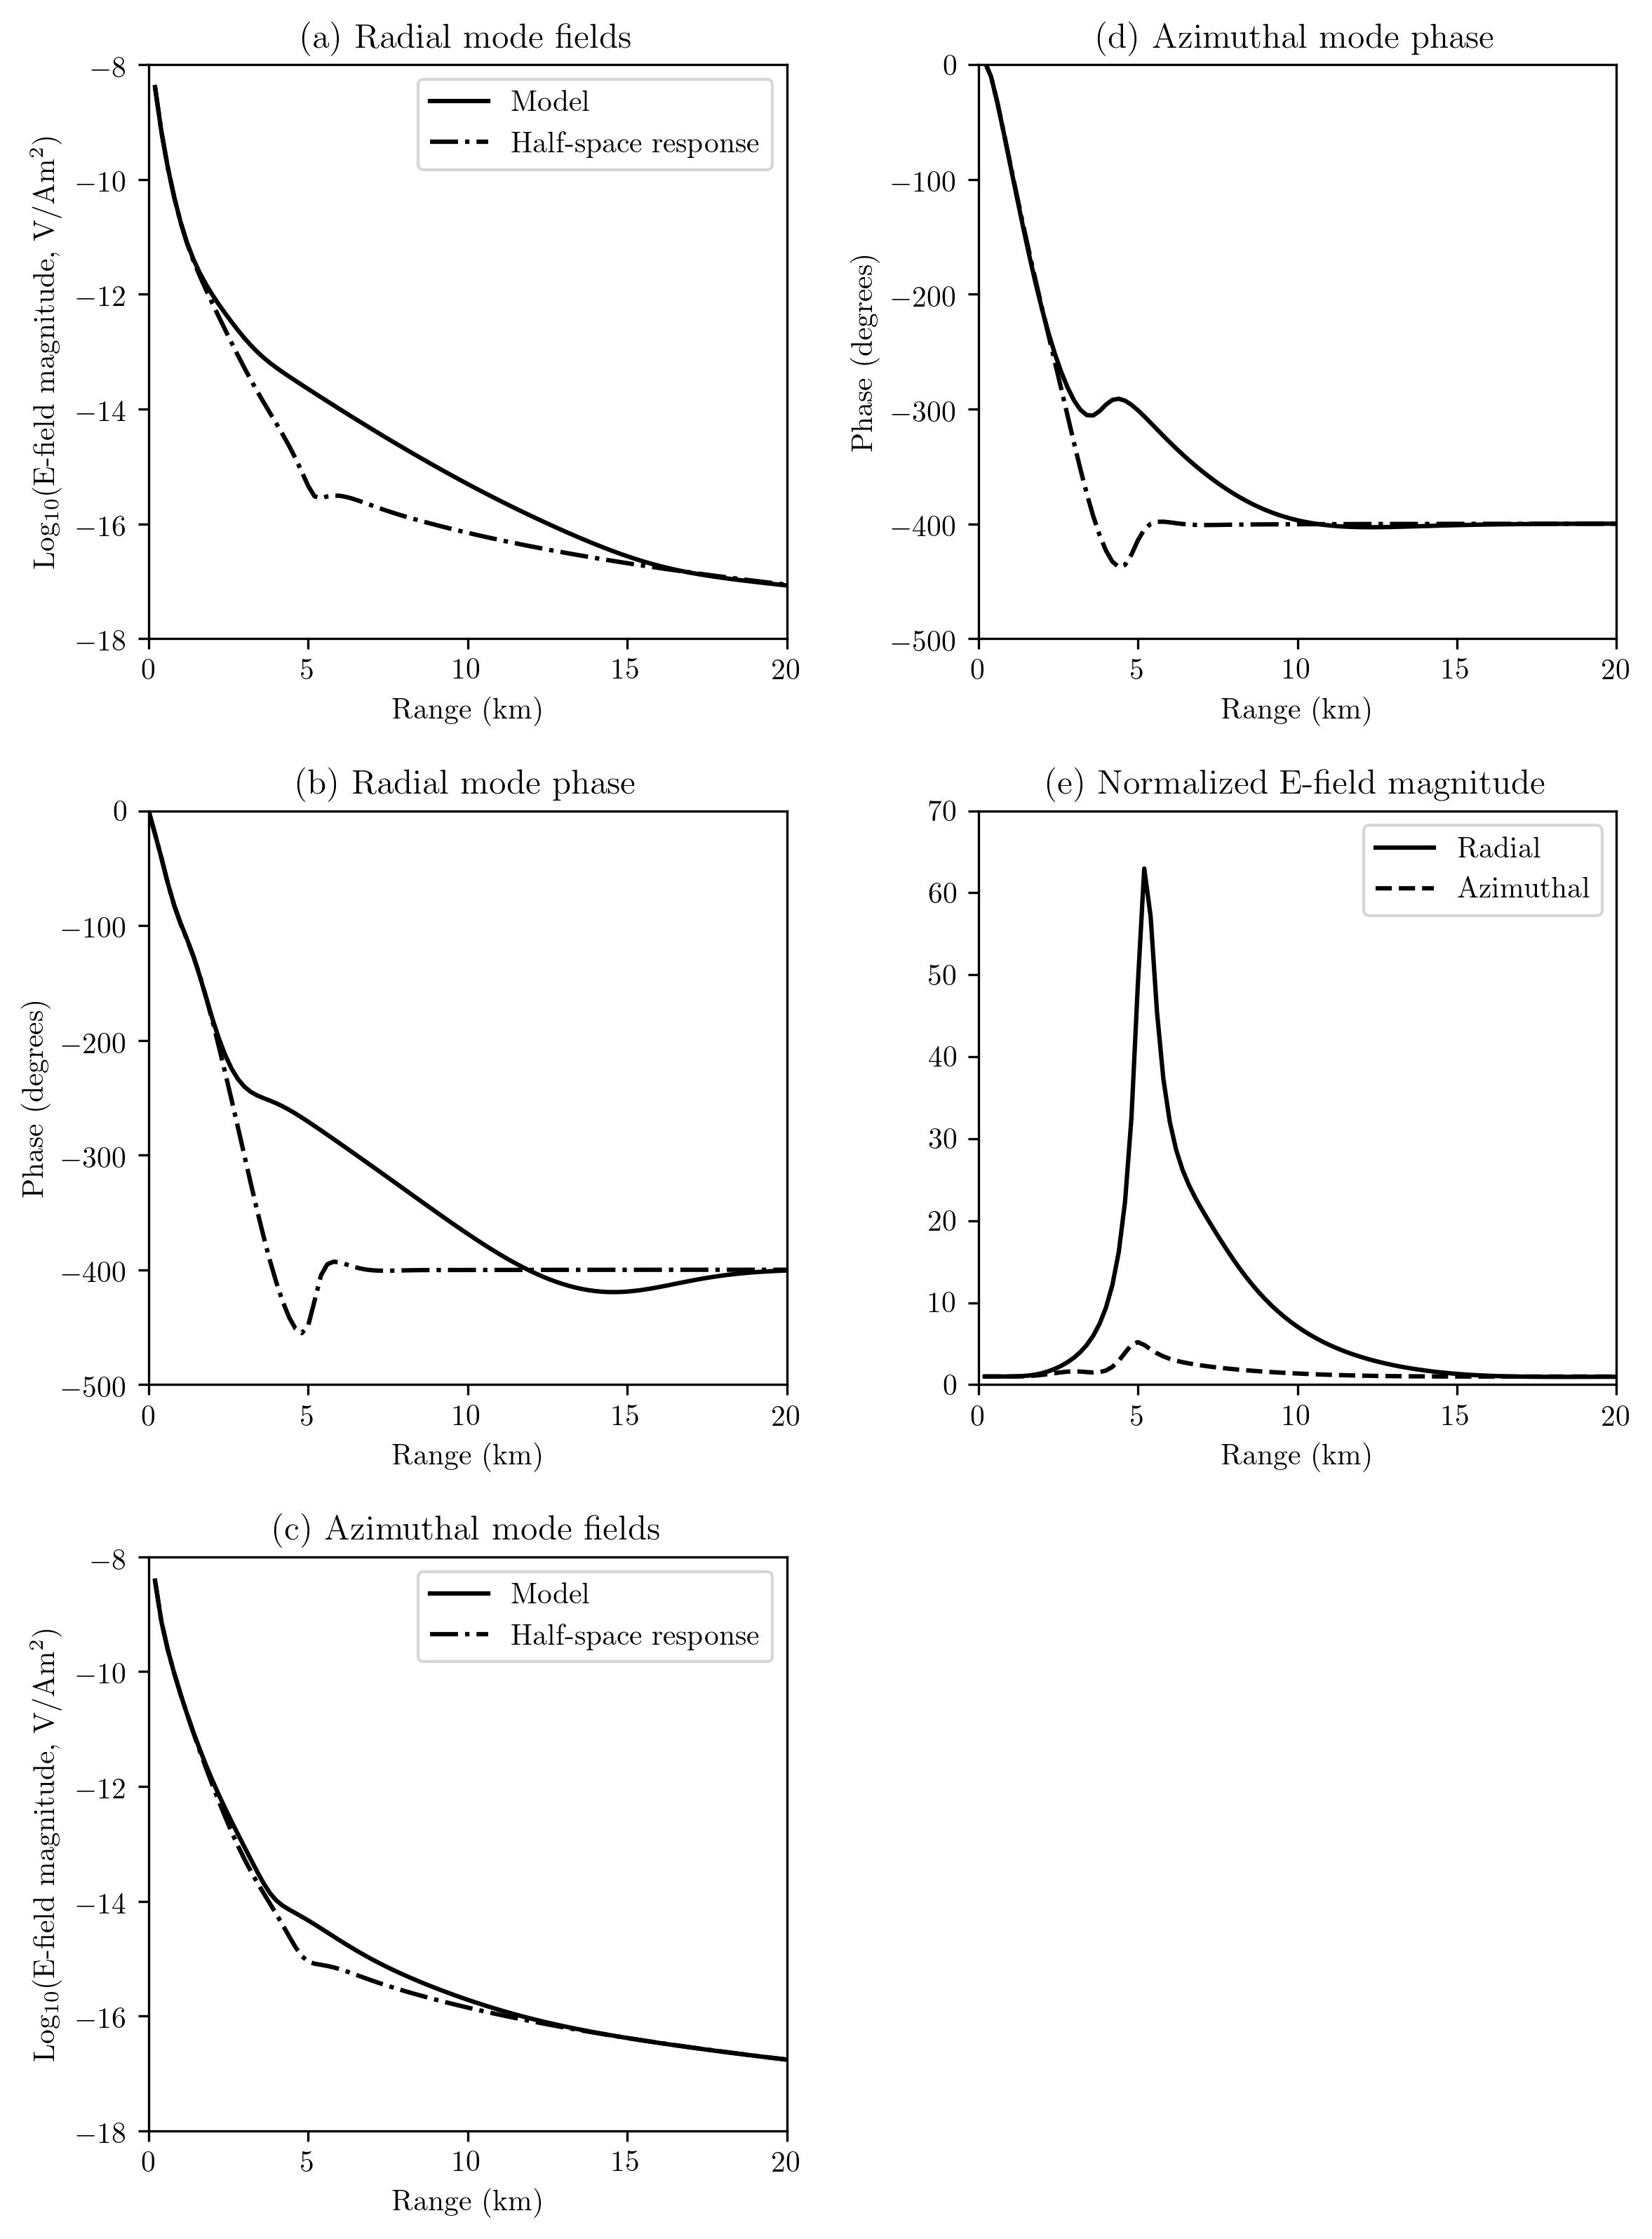

In [5]:
plt.figure(figsize=(9, 13))
plt.subplots_adjust(wspace=.3, hspace=.3)

# Radial amplitude
plt.subplot(321)
plt.title('(a) Radial mode fields')
plt.plot(x/1000, np.log10(rtg.amp), 'k', label='Model')
plt.plot(x/1000, np.log10(rhs.amp), 'k-.', label='Half-space response')
plt.axis([0, 20, -18, -8])
plt.xlabel('Range (km)')
plt.ylabel(r'Log$_{10}$(E-field magnitude, V/Am$^2$)')
plt.legend()

# Radial phase
plt.subplot(323)
plt.title('(b) Radial mode phase')
plt.plot(x/1000, rtg.pha, 'k')
plt.plot(x/1000, rhs.pha, 'k-.')
plt.axis([0, 20, -500, 0])
plt.xlabel('Range (km)')
plt.ylabel('Phase (degrees)')


# Azimuthal amplitude
plt.subplot(325)
plt.title('(c) Azimuthal mode fields')
plt.plot(x/1000, np.log10(atg.amp), 'k', label='Model')
plt.plot(x/1000, np.log10(ahs.amp), 'k-.', label='Half-space response')
plt.axis([0, 20, -18, -8])
plt.xlabel('Range (km)')
plt.ylabel(r'Log$_{10}$(E-field magnitude, V/Am$^2$)')
plt.legend()

# Azimuthal phase
plt.subplot(322)
plt.title('(d) Azimuthal mode phase')
plt.plot(x/1000, atg.pha+180, 'k')
plt.plot(x/1000, ahs.pha+180, 'k-.')
plt.axis([0, 20, -500, 0])
plt.xlabel('Range (km)')
plt.ylabel('Phase (degrees)')


# Normalized
plt.subplot(324)
plt.title('(e) Normalized E-field magnitude')
plt.plot(x/1000, np.abs(rtg/rhs), 'k', label='Radial')
plt.plot(x/1000, np.abs(atg/ahs), 'k--', label='Azimuthal')
plt.axis([0, 20, 0, 70])
plt.xlabel('Range (km)')
plt.legend()

plt.show()

In [6]:
from empyscripts import versions
versions('HTML')